### Dataset a first processing and model fit, prediction and evaluation

** Drive mount and Package load **

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/datasets/creditcard/

/content/drive/MyDrive/Colab Notebooks/datasets/creditcard


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

** load datasets **

* `V1 ~ V28` : PCA로 압축한 고객의 민감한 정보라 은닉한것
* Amount - Credit Card Usage amount
* Class - 0(normal state), 1(Abnormal State, Fraud)

In [4]:
card_df = pd.read_csv("./creditcard.csv")
card_df.head(n=3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
card_df.shape  # (284807, 31)

(284807, 31)

In [6]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Preprocessing 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
def get_processed_df(df=None):
  """
  인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
  return preproceseed datasets 
  """
  df_copy = df.copy()
  df_copy.drop('Time', axis = 1, inplace=True)
  return df_copy

In [9]:
def get_train_test_dataset(df=None):
  """
  사전 데이터 가공 후 학습과 테스트 데이터 세트반환
  """
  df_copy = get_processed_df(df)

  # 데이터프레임의 맨 마지막 컬럼이 레이블, 나머지는 피처
  X_features = df_copy.iloc[:, : -1]
  y_target = df_copy.iloc[:, -1]

  # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
  # y_target의 값의 분포도에 따라 학습 셋과 테스트셋을 반환
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.3, random_state=0, stratify=y_target)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [10]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


### function for model evaluation

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [12]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  """
  display accuracy, precision, recall, f score, roc auc
  오차행렬, 정확도, 정밀도, 재현율, F1 Score, ROC AUC Score
  """
  confusion = confusion_matrix(y_test,  pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  # ROC-AUC추가 
  roc_auc = roc_auc_score(y_test, pred_proba)
  display("오차행렬")
  display(confusion)

  display("Accuracy : {0:.4f}, Precision : {1:.4f}, Recall : {2:.4f} , F score : {3:.4f}, AUC : {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))


### Fit, predict and Evaluation for Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# 모델 생성 및 학습 , 예측, 평가 수행
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

'오차행렬'

array([[85280,    15],
       [   55,    93]])

'Accuracy : 0.9992, Precision : 0.8611, Recall : 0.6284 , F score : 0.7266, AUC : 0.9568'

Accuracy : 0.9992, Precision : 0.8611, Recall : 0.6284 , F score : 0.7266, AUC : 0.9568

In [15]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, trgt_train=None, trgt_test=None):
  """
  parameter : estimator, train and test datasets
  function  : fit , predict, evaluation(모델별로 학습, 예측 및 평가)
  """
  model.fit(ftr_train, trgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(trgt_test, pred, pred_proba)

** LightGBM fit/prediction/evaluation.**

(boost_from_average가 True일 경우 레이블 값이 극도로 불균형 분포를 이루는 경우 재현률 및 ROC-AUC 성능이 매우 저하됨.)  
   LightGBM 2.1.0 이상 버전에서 이와 같은 현상 발생 

In [16]:
from lightgbm import LGBMClassifier

In [17]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, trgt_train=y_train, trgt_test=y_test)

'오차행렬'

array([[85289,     6],
       [   36,   112]])

'Accuracy : 0.9995, Precision : 0.9492, Recall : 0.7568 , F score : 0.8421, AUC : 0.9797'

Accuracy : 0.9995, Precision : 0.9492, Recall : 0.7568 , F score : 0.8421, AUC : 0.9797

### Critical data confirmation for frequency distribution


** Confirmation of the critical feature distribution **

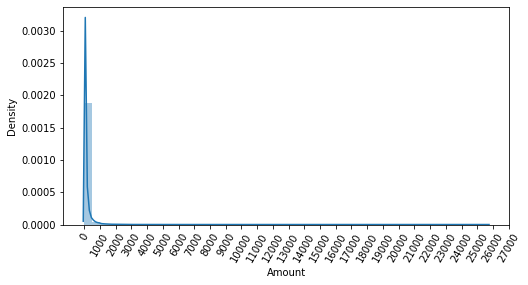

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0,  30000, 1000), rotation= 60)   # X축의 눈금을 0부터 30000까지 하는데 1000씩 증가.
sns.distplot(card_df['Amount'])
plt.show()

** 데이터 사전 가공을 위한 별도의 함수에 StandardScaler를 이용하여 Amount 피처 변환 **

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
def get_processed_df(df=None):
  """
  convert amount featutre to the normal distribution of data
  사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
  """
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))  

  #변환된 Amount feature를 Amount_Scaled로 피처명 변경 후 DataFrame맨 앞 컬럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)

  # 기존 Time, Amount피처 삭제
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [ ]:
help(StandardScaler)

** StandardScaler 변환 후 로지스틱 회귀 및 LightGBM 학습/예측/평가 **

In [21]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("#### logistic Regression Prediction Performacne ####")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, trgt_train=y_train, trgt_test=y_test)

print("#### LightGBM Prediction Performance ####")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, trgt_train=y_train, trgt_test=y_test)

#### logistic Regression Prediction Performacne ####


'오차행렬'

array([[85281,    14],
       [   58,    90]])

'Accuracy : 0.9992, Precision : 0.8654, Recall : 0.6081 , F score : 0.7143, AUC : 0.9702'

#### LightGBM Prediction Performance ####


'오차행렬'

array([[85289,     6],
       [   36,   112]])

'Accuracy : 0.9995, Precision : 0.9492, Recall : 0.7568 , F score : 0.8421, AUC : 0.9773'

[LogisticRegression]

Accuracy : 0.9992, Precision : 0.8654, Recall : 0.6081 , F score : 0.7143, AUC : 0.9702

[LightGBM]

Accuracy : 0.9995, Precision : 0.9492, Recall : 0.7568 , F score : 0.8421, AUC : 0.9773

** Amount를 로그 변환 **
- In case of the imbalanced data

In [22]:
def get_processed_df(df=None):
  """
  convert amount with log1p
  """
  df_copy = df.copy()
  # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, "Amount_Scaled", amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

* `e = 2.302581`
* `로그함수 - e를 거듭제곱하여 특정한 값이 되는 수를 찾아야 할때 사용`
* `np.log(10)` - 거듭제곱해서 `10`이 되는 수를 찾으면?

In [29]:
# log1p 와 expm1 설명 
import numpy as np

print(1e-1000 == 0.0)

print(np.log(1e-1000))

print(np.log(1e-1000 + 1))
print(np.log1p(1e-1000))

True
-inf
0.0
0.0


In [37]:
var_1 = np.log1p(100)
var_2 = np.expm1(var_1)
print(var_1, var_2)

4.61512051684126 100.00000000000003


In [23]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### LogisticRegression Performance monitor #####")
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, trgt_train=y_train, trgt_test=y_test)

print('### LightGBM Performance Monotoring ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, trgt_train=y_train, trgt_test=y_test)

### LogisticRegression Performance monitor #####


'오차행렬'

array([[85283,    12],
       [   59,    89]])

'Accuracy : 0.9992, Precision : 0.8812, Recall : 0.6014 , F score : 0.7149, AUC : 0.9727'

### LightGBM Performance Monotoring ###


'오차행렬'

array([[85290,     5],
       [   35,   113]])

'Accuracy : 0.9995, Precision : 0.9576, Recall : 0.7635 , F score : 0.8496, AUC : 0.9786'

[Logistic Regression]

Accuracy : 0.9992, Precision : 0.8812, Recall : 0.6014 , F score : 0.7149, AUC : 0.9727

[LightGBM]

Accuracy : 0.9995, Precision : 0.9576, Recall : 0.7635 , F score : 0.8496, AUC : 0.9786

### Model fit, predict and evaluation after the removal of outliers

** Visualization correlation between the features and determinant of class **

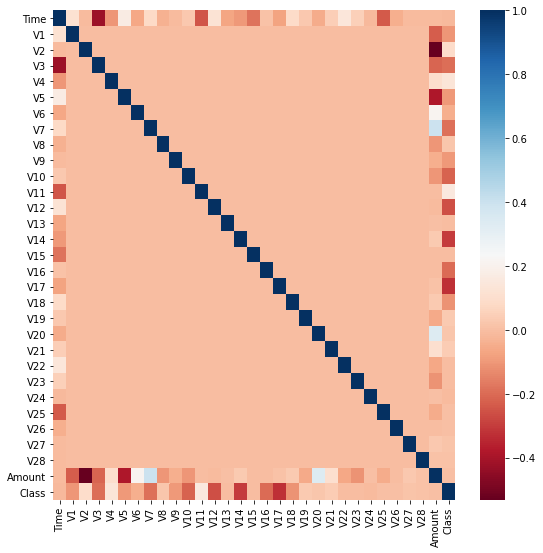

In [24]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()   # `1`과 `-1`사이의 컬럼맵을 갖는다
sns.heatmap(corr, cmap='RdBu')

* `label인 Class와 강한 음의 상관관계`를 갖는 `V14와 V17`을 위주로 이상치를 제거하도록 해보자.

** Dataframe에서 outlier에 해당하는 데이터를 필터링하기 위한 함수 생성. outlier 레코드의 index를 반환함. **

In [25]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  """
  get the Index where the outlier located in dataframe
  """
  # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
  fraud = df[df['Class']== 1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)

  # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  # 아웃라이어는 가장 큰 값보다 큰 값 혹은 가장 작은 값보다 작은 것이므로
  # 해당 값들의 인덱스를 찾아 리턴
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [58]:
display(np.percentile(card_df['V14'].values, 75)) # 3분위 값

0.493149849218149

In [61]:
display(np.percentile(card_df['V14'].values, 25))  # 1분위 값

-0.4255740124549935

In [66]:
display(np.percentile(card_df['V14'].values, 100), np.max(card_df['V14']))

10.5267660517847

10.5267660517847

In [67]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print("Outlier data index  : ", outlier_index)

Outlier data index  :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


**로그 변환 후 V14 피처의 이상치 데이터를 삭제한 뒤 모델들을 재 학습/예측/평가**
* `LogisticRegression`에 비해 `LightGBM`이 더 나은 정확도,정밀도 및 재현율을 갖음

In [69]:
def get_processed_df(df=None):
  """
  1.log1p() convert for Amount feature.
  2.Find the outlier index 
  3.로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
  """
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace = True)

  # 이상치 데이터 삭제하는 로직 추가
  outliner_index = get_outlier(df=df_copy, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)   
  return df_copy
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### Logistic Regression Prediction Performance Monitoring ###')

get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, trgt_train=y_train, trgt_test=y_test)

print('### LightGBM Prediction Performance Monitoring ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, trgt_train=y_train, trgt_test=y_test)

### Logistic Regression Prediction Performance Monitoring ###


'오차행렬'

array([[85281,    14],
       [   48,    98]])

'Accuracy : 0.9993, Precision : 0.8750, Recall : 0.6712 , F score : 0.7597, AUC : 0.9743'

### LightGBM Prediction Performance Monitoring ###


'오차행렬'

array([[85291,     4],
       [   25,   121]])

'Accuracy : 0.9997, Precision : 0.9680, Recall : 0.8288 , F score : 0.8930, AUC : 0.9831'

### Model fit, prediction and evaluation after SMOTE oversampling
* `SMOTE`를 적용시에는 반드시 학습데이터 세트만 증식해야 함
* 검증 데이터셋트 혹은 테스트 데이터셋트를 하면 Overfitting의 위험이 있다.

In [51]:
from imblearn.over_sampling import SMOTE

In [ ]:
help(SMOTE)

In [52]:
smote = SMOTE(random_state=0)

# fit_sample() - 오버샘플링한 결과를 각각 리턴
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

display("Before SMOTE - train feauture : {0}, test : {1}".format(X_train.shape, y_train.shape))
display("After SMOTE - train feauture : {0}, test : {1}".format(X_train_over.shape, y_train_over.shape))
display("Label values distribution after SMOTE \n", pd.Series(y_train_over).value_counts())

'Before SMOTE - train feauture : (199362, 29), test : (199362,)'

'After SMOTE - train feauture : (398040, 29), test : (398040,)'

'Label values distribution after SMOTE \n'

1    199020
0    199020
dtype: int64

In [70]:
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

** Fit, Prediction and Evaluation using LogisticRegression **

In [71]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, trgt_train=y_train_over, trgt_test=y_test)

'오차행렬'

array([[82937,  2358],
       [   11,   135]])

'Accuracy : 0.9723, Precision : 0.0542, Recall : 0.9247 , F score : 0.1023, AUC : 0.9737'

Precision이 기대 이하 수준임을 보여준다. SMOTE 오버샘플링을 하게 되면 아래와 같이 현실업무에 적용이 불가능한 사례가 발생할 수 있음을 유의.

일반적으로 SMOTE샘플링을 하게되면 재현율은 높아지나 정밀도가 낮아지는 경우가 발생한다.

좋은 SMOTE패키지 일수록 재현율 증가율은 높이고, 정밀도 감소율은 낮출수 있도록 효과적으로 데이터를 증식하는 것이 중요.

Accuracy : 0.9723, Precision : 0.0542, Recall : 0.9247 , F score : 0.1023, AUC : 0.9737

** Visualization for Precision Recall Curve **

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [ ]:
help(precision_recall_curve)

In [49]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 dl thresholds에 따른 정밀도, 재현율을 ndarray로 추출
  precision, recall, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 thresholds값, Y축은 정밀도, 재현율 값으로 각각 Plot수행
  # 정밀도는 점선으로 표시
  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precision[0: threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recall[0: threshold_boundary], label='recall', color='red')

  # threshold값 X축의 Scale을 0.1단위로 변경
  start, end = plt.xlim() 
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlabel('Threshold Vales');plt.ylabel("Precision and Recall Values")
  plt.legend(); plt.grid()
  plt.show()

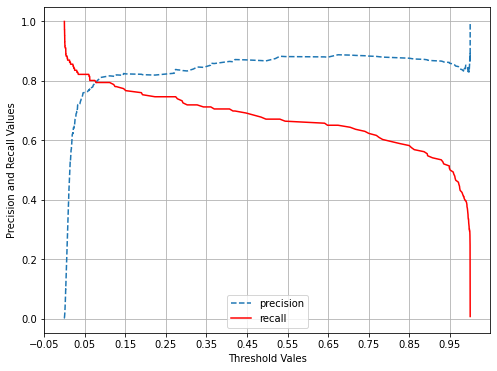

In [50]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

** LightGBM 모델 적용 **

In [56]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  trgt_train=y_train_over, trgt_test=y_test)

'오차행렬'

array([[85286,     9],
       [   22,   124]])

'Accuracy : 0.9996, Precision : 0.9323, Recall : 0.8493 , F score : 0.8889, AUC : 0.9789'

* SMOTE오버 샘플링을 하기 전과 비교했을때 정밀도는 소폭하락하지만 , 재현율은 높아짐을 유의.